## 11)

У нас есть уравнение

$$-\psi''(r) + l(l + 1)r^{-2}\psi(r)-2r^{-1}\psi(r) = 2E_{nl}\psi(r),\;\psi(0)=0,\;\psi(\infty) = 0$$

В первом пункте нам предлагается считать $l = 0$, заменить условие $\psi(\infty) = 0$ на $\psi(R) = 0$, в частности начать с $R = 10$.

Когда в качестве $l$ мы подставляем $0$, у нас получается, что 

$$E_{nl} = -\frac{1}{2(n + l + 1) ^ 2} = -\frac{1}{2(n + 1)^2}$$

То есть на самом деле, у нас получается:

$$-\psi''(r) -2r^{-1}\psi(r)=2E_{nl}\psi(r),\;\psi(0)=0,\;\psi(10)=0$$

Теперь построим матрицу, найдем ее собственные значения и сравним с $E_{nl}$

In [1]:
def get_e_nl(n):
    return - 1.0 / (2 * (n + 1) ** 2)

Заменили вторую производную на $\frac{y_{n + 1} - 2y_{n} + y_{n - 1}}{h^2}$, получили

$$-\frac{y_{n + 1} - 2y_{n} + y_{n - 1}}{h^2}-2x_n^{-1} y_{n} = 2E_{nl}y_n$$

Нам надо преобразовать левую часть к виду $A y$

У нас получатся уравнения:

$$
\begin{cases}
    \frac{2 y_1 - y_2}{h^2} - 2x_1^{-1} y_1 = 0 \\
    -\frac{1}{h^2} \cdot \big(y_{n + 1} - 2y_{n}+y_{n - 1}\big) -2x_n^{-1} y_{n} = 0,\; n = 2,3,\dots,N-2\\
    \frac{2y_{N - 1} - y_{N - 2}}{h^2} - 2x_{N - 1}^{-1}y_{N - 1} = 0 
\end{cases}
$$

На самом деле, лучше будем рассматривать как $\lambda$ именно $E_{nl}$, а не $2E_{nl}$. По этому поводу просто поделим матрицу на два.

Еще точнее, чтобы привести к виду ЗШЛ, надо домножить уравнение на $-1$. И после этого сранивать значение с $-E_{nl}$

In [30]:
import numpy as np

def get_coef(x):
    return -2 * x ** (-1)

def get_matrix(N, R=10):
    h = R / N
    xs = [h * i for i in range(1, N)]
    A = []
    for i in range(1, N):
        A.append(np.zeros(N - 1))
        A[-1][i - 1] = 2 / h ** 2 + get_coef(xs[i - 1])
        if i != 1:
            A[-1][i - 2] = -1 / h ** 2
        if i != N - 1:
            A[-1][i] = -1 / h ** 2
    return np.array(A) / -2

In [31]:
get_matrix(N=5, R=10)

array([[ 0.25      ,  0.125     , -0.        , -0.        ],
       [ 0.125     , -0.        ,  0.125     , -0.        ],
       [-0.        ,  0.125     , -0.08333333,  0.125     ],
       [-0.        , -0.        ,  0.125     , -0.125     ]])

In [61]:
import matplotlib.pyplot as plt

def build_plot(xs, ys, xlabel='', ylabel='', title='', filename='plot', 
               plot_labels=None):
    plt.clf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for ind, (x, y) in enumerate(zip(xs, ys)):
        if plot_labels is not None:
            plt.plot(x, y, label=plot_labels[ind])
        else:
            plt.plot(x, y)
    if plot_labels is not None:
        plt.legend()
    plt.show()

Нам нужно вычислить значение с погрешностью $\varepsilon = 10^{-5}$

Для этого применим теоретическую оценку погрешности $\mathcal{O}(h^2)$

Тем самым, погрешность $\mathcal{O}\big(\big(\frac{R}{N}\big)^2\big)$, то есть $N \geqslant R \cdot 10^{\frac{5}{2}}$

На самом деле, непонятно, какая там будет константа, так что можно пробовать меньше. Например,

In [63]:
10**(5/2)

316.22776601683796

Вычислим первое собственное значение

In [129]:
from numpy import linalg as LA

i = 0
N = 1250
R = 10

w, values1 = LA.eig(get_matrix(N, R))
numbers1 = np.argsort(w)
n = w[numbers1[-1]]
m = -get_e_nl(i)
d = np.abs(n-m)
print('N = {N}, R = {R}'.format(N=N, R=R))
print('numpy: {n}, correct: {m}, delta = {d}'.format(n=n,
                                                     m=m,
                                                     d=d))

N = 1250, R = 10
numpy: 0.4999912633753236, correct: 0.5, delta = 8.73662467637537e-06


Второе:

In [91]:
from numpy import linalg as LA

i = 1
N = 1250
R = 30

w, values2 = LA.eig(get_matrix(N, R))
numbers2=np.argsort(w)
w.sort()
n = w[-i-1]
m = -get_e_nl(i)
d = np.abs(n-m)
print('N = {N}, R = {R}'.format(N=N, R=R))
print('numpy: {n}, correct: {m}, delta = {d}'.format(n=n,
                                                     m=m,
                                                     d=d))

N = 1250, R = 30
numpy: 0.12499549679024587, correct: 0.125, delta = 4.5032097541336524e-06


Третье:

In [92]:
from numpy import linalg as LA

i = 2
N = 1250
R = 40

w, values3 = LA.eig(get_matrix(N, R))
numbers3=np.argsort(w)
w.sort()
n = w[-i-1]
m = -get_e_nl(i)
d = np.abs(n-m)
print('N = {N}, R = {R}'.format(N=N, R=R))
print('numpy: {n}, correct: {m}, delta = {d}'.format(n=n,
                                                     m=m,
                                                     d=d))

N = 1250, R = 40
numpy: 0.05555265404336704, correct: 0.05555555555555555, delta = 2.901512188513422e-06


Четвертое:

In [93]:
from numpy import linalg as LA

i = 3
N = 1250
R = 60

w, values4 = LA.eig(get_matrix(N, R))
numbers4=np.argsort(w)
w.sort()
n = w[-i-1]
m = -get_e_nl(i)
d = np.abs(n-m)
print('N = {N}, R = {R}'.format(N=N, R=R))
print('numpy: {n}, correct: {m}, delta = {d}'.format(n=n,
                                                     m=m,
                                                     d=d))

N = 1250, R = 60
numpy: 0.031247023780047525, correct: 0.03125, delta = 2.976219952474657e-06


Пятое:

In [94]:
from numpy import linalg as LA

i = 4
N = 1250
R = 80

w, values5 = LA.eig(get_matrix(N, R))
numbers5=np.argsort(w)
w.sort()
n = w[-i-1]
m = -get_e_nl(i)
d = np.abs(n-m)
print('N = {N}, R = {R}'.format(N=N, R=R))
print('numpy: {n}, correct: {m}, delta = {d}'.format(n=n,
                                                     m=m,
                                                     d=d))

N = 1250, R = 80
numpy: 0.01999351079608076, correct: 0.02, delta = 6.489203919241016e-06


На самом деле, выглядит что там очень маленькая константа, потому что соотношение между $N$ и $R$ отличается от почитанного нами теоретического.

Теперь нужно построить первые пять собственных функций.

Для удобства подберем $(R, N)$, которые подходят всем пяти с.з.

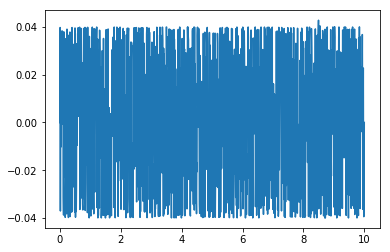

In [151]:
i = 0

N = 1250
R = 10
h = R / N

xs = [j * h for j in range(N + 1)]
ys = [0]
ys += values1[numbers1[-i-1]].tolist()
ys += [0]
build_plot([xs], [ys])

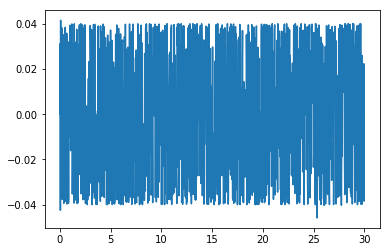

In [152]:
i = 1

N = 1250
R = 30
h = R / N

xs = [j * h for j in range(N + 1)]
ys = [0]
ys += values2[numbers2[-i-1]].tolist()
ys += [0]
build_plot([xs], [ys])

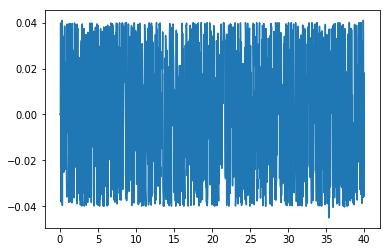

In [158]:
i = 2

N = 1250
R = 40
h = R / N

xs = [j * h for j in range(N + 1)]
ys = [0]
ys += values3[numbers3[-i-1]].tolist()
ys += [0]
build_plot([xs], [ys])

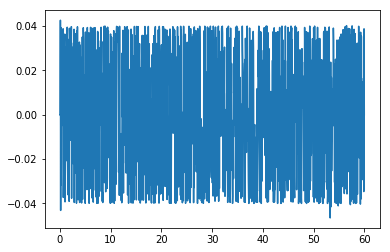

In [157]:
i = 3

N = 1250
R = 60
h = R / N

xs = [j * h for j in range(N + 1)]
ys = [0]
ys += values4[numbers4[-i-1]].tolist()
ys += [0]
build_plot([xs], [ys])

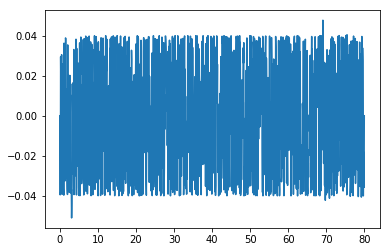

In [156]:
i = 4

N = 1250
R = 80

h = R / N
xs = [j * h for j in range(N + 1)]
ys = [0]
ys += values5[numbers5[-i-1]].tolist()
ys += [0]
build_plot([xs], [ys])

Вроде ничего интересного не наблюдается, что даже странно. Так что прокомментировать тоже нечего :)

Теперь перейдем к методу Нумерова

У нас есть выражение вида $Ay - \lambda B y = 0$

Тогда нам придется обратить матрицу: $B^{-1}Ay=\lambda y$

In [204]:
from numpy.linalg import inv

def get_matrix_numerov(N, R=100):
    h = R / N
    xs = [h * i for i in range(1, N)]
    
    A = []
    for i in range(1, N):
        A.append(np.zeros(N - 1))
        A[-1][i - 1] = 2 / h ** 4 + get_coef(xs[i - 1]) - 1.0 / (6 * h ** 2) * get_coef(xs[i - 1])
        if i != 1:
            A[-1][i - 2] = -1 / h ** 4 + 1.0 / (12 * h ** 2) * get_coef(xs[i - 2])
        if i != N - 1:
            A[-1][i] = -1 / h ** 4 + 1.0 / (12 * h ** 2) * get_coef(xs[i])
    
    B = []
    for i in range(1, N):
        B.append(np.zeros(N - 1))
        B[-1][i - 1] = 1 - 1 / (6 * h ** 2)
        if i != 1:
            B[-1][i - 2] = 1 / (12 * h ** 2)
        if i != N - 1:
            B[-1][i] = 1 / (12 * h ** 2)
    
    return -np.matmul(inv(B), A) / 2

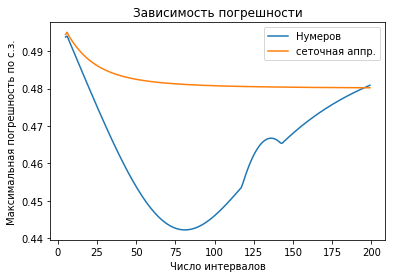

In [214]:
NS = range(5, 200)
R = 200

values = [[], []]

for N in NS:
    m1 = get_matrix_numerov(N, R)
    m2 = get_matrix(N, R)
    w1, _ = LA.eig(m1)
    w1.sort()
    w2, _ = LA.eig(m2)
    w2.sort()
    w1 = w1[-5:]
    w2 = w2[-5:]
    values[0].append(max([np.abs(w + get_e_nl(i)) for i, w in enumerate(w1)]))
    values[1].append(max([np.abs(w + get_e_nl(i)) for i, w in enumerate(w2)]))

build_plot([NS, NS], 
           values, 
           'Число интервалов', 
           'Максимальная погрешность по с.з.',
           'Зависимость погрешности', 
           plot_labels=['Нумеров', 'сеточная аппр.'])

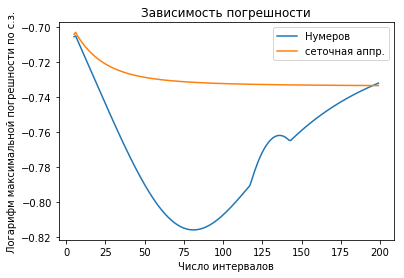

In [215]:
NS = range(5, 200)
R = 200

values = [[], []]

for N in NS:
    m1 = get_matrix_numerov(N, R)
    m2 = get_matrix(N, R)
    w1, _ = LA.eig(m1)
    w1.sort()
    w2, _ = LA.eig(m2)
    w2.sort()
    w1 = w1[-5:]
    w2 = w2[-5:]
    values[0].append(np.log(max([np.abs(w + get_e_nl(i)) for i, w in enumerate(w1)])))
    values[1].append(np.log(max([np.abs(w + get_e_nl(i)) for i, w in enumerate(w2)])))

build_plot([NS, NS], 
           values, 
           'Число интервалов', 
           'Логарифм максимальной погрешности по с.з.',
           'Зависимость погрешности', 
           plot_labels=['Нумеров', 'сеточная аппр.'])

Заметим, что на втором графике логарифм погрешность Нумерова не ведет себя, как прямая (а как что-то вогнутое), что, наверное, согласуется с тем, что мы результаты лучше, чем согласно оценке $\mathcal{O}(h^2)$. Ну либо там ооооочень маленькая константа, которая все забивает. Так или иначе, Нумеров ожидаемо веде себя лучше (в целом), хотя в конце они сранвниваются (мне кажется, что опять таки все прозаично -- больше операций, больше накапливаемая погрешность).